In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cardNameToInt(strings) :
    
    char1 = strings[0]
    char2 = strings[1]

    char_dict = {'3':4, '4':8, '5':12, '6':16, '7':20, '8':24, '9':28, 'T':32, 'J':36, 'Q':40, 'K':44, 'A':48}
    num = char_dict[char1]
        
    if char2 == 'd' : num += 1
    elif char2 == 'h' : num += 2
    elif char2 == 's' : num += 3
    return (num)

def generatePlayersCards(n_players,available_deck):
    # do things here
    players_cards = np.random.choice(available_deck, size=2 * n_players, replace=False)
    players_cards = players_cards.reshape(n_players, 2)
    updated_card_deck = np.setdiff1d(available_deck, players_cards)
    return (players_cards,updated_card_deck)

def generateDealerCards(available_deck):
    # do things here
    dealer_cards = np.random.choice(available_deck, 5, replace = False)
    updated_card_deck = np.setdiff1d(available_deck, dealer_cards)
    return(dealer_cards,updated_card_deck)

def compareTwoPlayers(player1_cards,player2_cards,dealer_cards):
    '''
    Defined function
    player1_cards and player2_cards: 1d numpy array of shape (2,)
    dealer_cards: 1d numpy array of shape (5,)
    Return 0 if player1 cards are better
    Return 1 if player2 cards are better
    Return 2 if equal
    '''
    return np.random.choice([0,1,2], size = 1)
    

def whoWin(start_cards, players_cards, dealer_cards):
    
    for i in range(len(players_cards)) :
        players_cards_i =  players_cards[i]
        if compareTwoPlayers(start_cards, players_cards_i, dealer_cards) == 0 :
            continue
        if compareTwoPlayers(start_cards, players_cards_i, dealer_cards) == 1 :
            return np.array([0,1,0])
        if compareTwoPlayers(start_cards, players_cards_i, dealer_cards) == 2 :
            return np.array([0,0,1])
    return np.array([1,0,0])



def monteCarloSimulation(M,N,n_players,starting_hand):
    # do stuff here
    win_prob = []
    start_cards = np.array([cardNameToInt(starting_hand[0]), cardNameToInt(starting_hand[1])])
    start_deck = np.arange(52)
    updated_deck0 = np.setdiff1d(start_deck, start_cards)
    for i in range(M) :
        result = np.zeros(3)
        for j in range(N) :
            players_cards, updated_deck1 = generatePlayersCards(n_players,updated_deck0)
            dealer_cards, _ =  generateDealerCards(updated_deck1)
            result += whoWin(start_cards, players_cards, dealer_cards)
        prob = float(result[0]) / N
        win_prob.append(prob)
    win_prob = np.array(win_prob)
    return win_prob



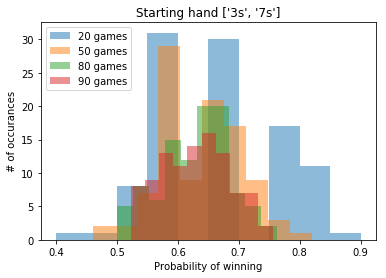

In [3]:
starting_hand = ['3s', '7s']
win_prob_20 = monteCarloSimulation(100,20,1,starting_hand)
win_prob_50 = monteCarloSimulation(100,50,1,starting_hand)
win_prob_80 = monteCarloSimulation(100,80,1,starting_hand)
win_prob_90 = monteCarloSimulation(100,90,1,starting_hand)

mean_20 = np.mean(win_prob_20)
mean_50 = np.mean(win_prob_50)
std_20 = np.std(win_prob_20)
std_50 = np.std(win_prob_50)

plt.hist(win_prob_20,alpha=0.5, label='20 games')
plt.hist(win_prob_50,alpha=0.5, label='50 games')
plt.hist(win_prob_80,alpha=0.5, label='80 games')
plt.hist(win_prob_90,alpha=0.5, label='90 games')
plt.title('Starting hand ' + str(starting_hand))
plt.legend(loc='upper left')
plt.xlabel('Probability of winning')
plt.ylabel('# of occurances')
plt.show()